In [1]:
import pandas as pd

In [2]:
orders=pd.read_csv('./data/orders.csv')

In [3]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


## 데이터 파악

In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [5]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

### Result 
- days_since_prior_order 에 결측값이 있는 것 확인  
days_since_prior_order은 마지막 구매일로부터 걸린 시간을 의미하며 NA값은 첫 구매임
- days_since_prior_order에 대해 세부적으로 확인해보기

In [6]:
orders['days_since_prior_order'].unique()

array([nan, 15., 21., 29., 28., 19., 20., 14.,  0., 30., 10.,  3.,  8.,
       13., 27.,  6.,  9., 12.,  7., 17., 11., 22.,  4.,  5.,  2., 23.,
       26., 25., 16.,  1., 18., 24.])

### Visualization
- days_since_prior_order 값의 분포에 대해 선히스토그램 그래프 그리기

In [7]:
# days_since_prior_order의 nan값의 갯수도 확인 하기 위해 NAN값을 -1로 처리
orders['days_since_prior_order']=orders['days_since_prior_order'].fillna(-1)

In [8]:
orders['days_since_prior_order'].unique()

array([-1., 15., 21., 29., 28., 19., 20., 14.,  0., 30., 10.,  3.,  8.,
       13., 27.,  6.,  9., 12.,  7., 17., 11., 22.,  4.,  5.,  2., 23.,
       26., 25., 16.,  1., 18., 24.])

In [9]:
f_p_order=pd.pivot_table(orders, index = ['days_since_prior_order'], values=['order_id'], aggfunc='count')

In [10]:
f_p_order

,order_id
days_since_prior_order,
-1.0,206209
0.0,67755
1.0,145247
2.0,193206
3.0,217005
4.0,221696
5.0,214503
6.0,240013
7.0,320608


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

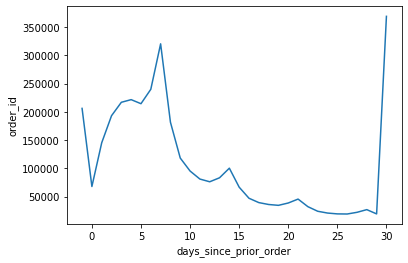

In [12]:
sns.lineplot(x='days_since_prior_order', y='order_id', data=f_p_order)

# 가설 2 ) 
- 어떤 요일에 주문량이 제일 많은지?
- 주중/ 주말에 많이 팔린 아이템은 무엇이 있을까? & 카테고리 
- 각 요일이 주문량에 영향을 주는지 확인 상관분석 

## 1. 어떤 요일에 주문량이 제일 많은지 ?

### 1-1 ) Group by
- 요일별 주문량에 대해 count, groupby수행
- 요일을 나타내는 column : order_dow
- 주문량을 나타내는 dataframe: order_info.csv ( order_products_prior & order_products_train Merge)

In [14]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,-1.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [15]:
grouped = orders.groupby("order_dow")["order_id"].aggregate({'Total_orders': 'count'}).reset_index()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


In [16]:
grouped

,order_dow,Total_orders
0,0,600905
1,1,587478
2,2,467260
3,3,436972
4,4,426339
5,5,453368
6,6,448761


### Visualize 
- visualize하기 위해 order_dow에 대한 파생변수 생성 
- order_dow => 0: sunday  ~ 6 :Satuday

In [17]:
def change_od(od):
    if od==0: day='Sunday'
    elif od==1: day='Monday'
    elif od==2: day='Tuesday'
    elif od==3: day='Wednesday'
    elif od==4: day='Thursday'
    elif od==5: day='Friday'
    else: day='Saturday'
    return day

In [18]:
grouped['day']=grouped['order_dow'].apply(lambda x: change_od(x))

In [19]:
grouped

,order_dow,Total_orders,day
0,0,600905,Sunday
1,1,587478,Monday
2,2,467260,Tuesday
3,3,436972,Wednesday
4,4,426339,Thursday
5,5,453368,Friday
6,6,448761,Saturday


C:\Users\admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


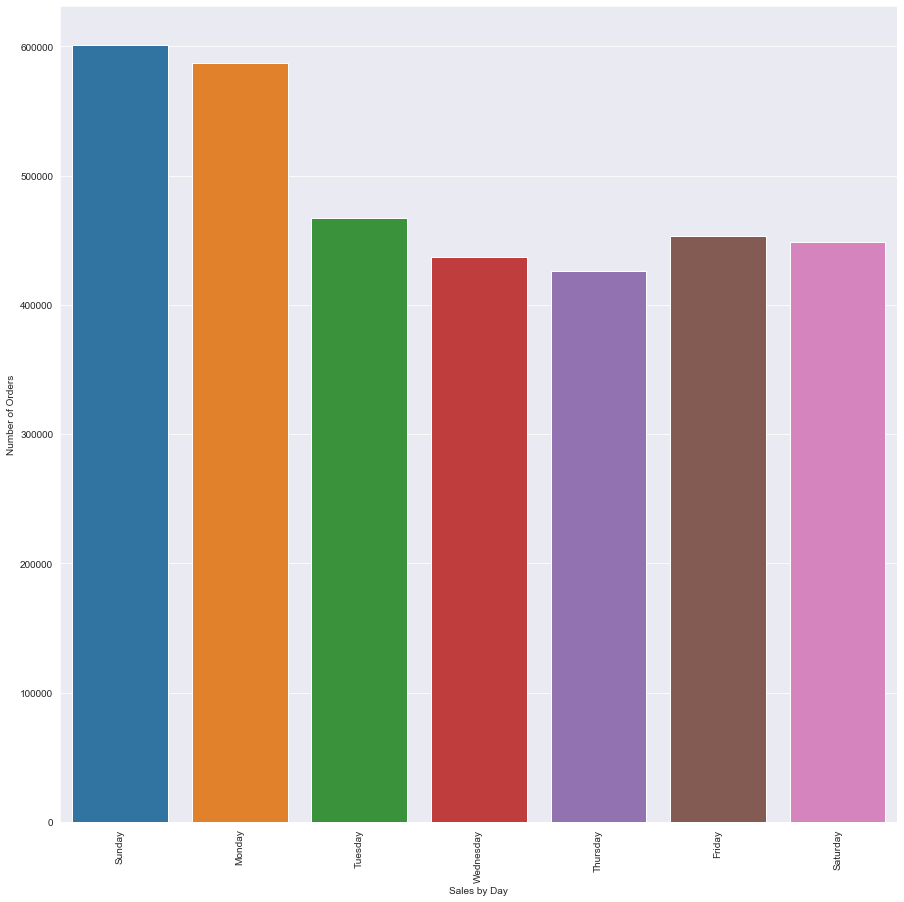

In [21]:
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(15, 15))
plt.xticks(rotation='vertical')
sns.barplot(grouped.day, grouped.Total_orders)          
plt.ylabel('Number of Orders', fontsize=10)
plt.xlabel('Sales by Day', fontsize=10)
# plt.show()
plt.savefig('hypo4.png')

In [22]:
# 날 별 시간별 주문량 확인
order_time = orders.groupby(["order_dow", "order_hour_of_day"])["order_id"].aggregate({'num_orders': 'count'}).reset_index()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


In [27]:
order_time.head()

,order_dow,order_hour_of_day,num_orders
0,0,0,3936
1,0,1,2398
2,0,2,1409
3,0,3,963
4,0,4,813


In [28]:
# over_dow에 대해서 요일 컬럼 만들기
order_time['day']=order_time['order_dow'].apply(lambda x: change_od(x))

In [29]:
order_time.head()

,order_dow,order_hour_of_day,num_orders,day
0,0,0,3936,Sunday
1,0,1,2398,Sunday
2,0,2,1409,Sunday
3,0,3,963,Sunday
4,0,4,813,Sunday


In [51]:
aa=pd.pivot_table(order_time, index='order_hour_of_day', columns='day', values='num_orders')

In [52]:
aa

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
order_hour_of_day,,,,,,,
0,3189,3674,3306,3936,2642,3059,2952
1,1672,1830,1919,2398,1512,1572,1495
2,1016,1105,1214,1409,899,943,953
3,841,748,863,963,686,719,654
4,910,809,802,813,730,744,719
5,1574,1607,1136,1168,1330,1399,1355
6,4866,5370,3243,3329,4401,4758,4562
7,13434,16571,11319,12410,12493,13245,12396
8,24015,34116,22960,28108,21814,24635,22553


In [53]:
aa=aa[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]

In [55]:
aa=aa.sort_index(ascending=False)

In [50]:
aa

day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
order_hour_of_day,,,,,,,
23,3674,3059,2952,2642,3189,3306,3936
22,1830,1572,1495,1512,1672,1919,2398
21,1105,943,953,899,1016,1214,1409
20,748,719,654,686,841,863,963
19,809,744,719,730,910,802,813
18,1607,1399,1355,1330,1574,1136,1168
17,5370,4758,4562,4401,4866,3243,3329
16,16571,13245,12396,12493,13434,11319,12410
15,34116,24635,22553,21814,24015,22960,28108


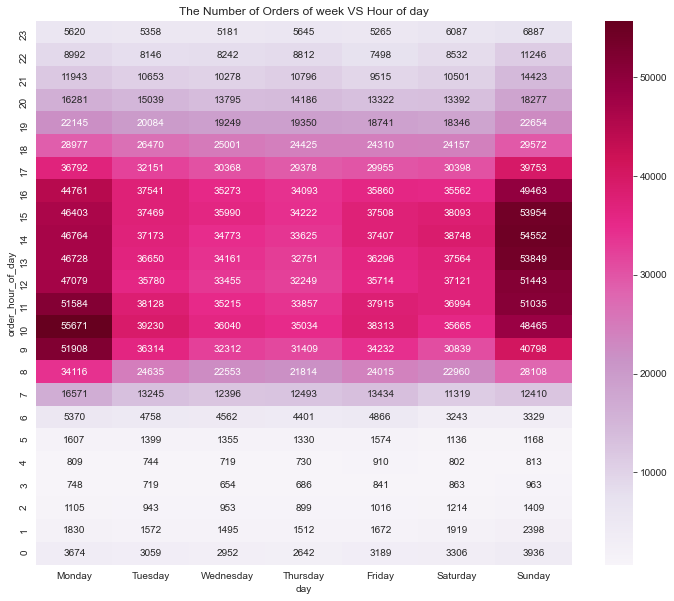

In [56]:
plt.figure(figsize=(12,10))
sns.heatmap(aa,  annot=True, fmt='d',cmap='PuRd')
plt.title("The Number of Orders of week VS Hour of day")
# plt.show()
plt.savefig('hypo5.png')


### Result
- 월요일 9시 ~ 11시, 

## 2. 각 요일 별 많이 팔린 아이템은 무엇이 있을까? & 카테고리


In [57]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,-1.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [62]:
order_info=pd.read_csv('order_info.csv')

In [74]:
order_info=order_info.iloc[:, 1:]

In [75]:
order_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 1.0 GB


In [76]:
order_info.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


### 2-1) 요일 별 팔린 아이템을 알아야하므로 데이터 merge
- orders & order_info merge 

In [77]:
item_sell=pd.merge(orders, order_info, how='inner')

In [ ]:
item_sell.head()

In [ ]:
orderbest.to_csv("orderbest.csv", header=True)